In [1]:
# iris Dataset

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isna().sum()

#No missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df['species'].value_counts()

# Data is balanced

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
df1 = df.loc[:,['sepal_width','petal_length']]
df1

,sepal_width,petal_length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


In [7]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]

In [8]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=101)
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


# Niave Bayes Theorem

In [11]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [12]:
y_pred_train = nb_model.predict(x_train)
y_pred_test = nb_model.predict(x_test)

In [13]:
# Evaluate the model
from sklearn.metrics import accuracy_score

In [14]:
print(accuracy_score(y_train, y_pred_train))
print("\n")
print(accuracy_score(y_test, y_pred_test))

0.9553571428571429


0.9736842105263158


# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred_train_dt = dt.predict(x_train)
y_pred_test_dt = dt.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
print(accuracy_score(y_train,y_pred_train_dt))
      
print('\n')
      
print(accuracy_score(y_pred_test_dt,y_test))

1.0


0.9736842105263158


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


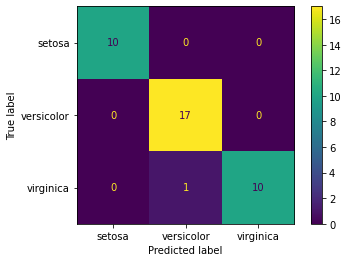

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, x_test,y_test)
plt.show()

In [20]:
dt.feature_importances_

array([0.        , 0.01791857, 0.54862472, 0.43345671])

In [21]:
pd.DataFrame( data=dt.feature_importances_, index = x.columns, columns =['feature_importances_'] )

,feature_importances_
sepal_length,0.000000
sepal_width,0.017919
petal_length,0.548625
petal_width,0.433457


<AxesSubplot:xlabel='species', ylabel='petal_length'>

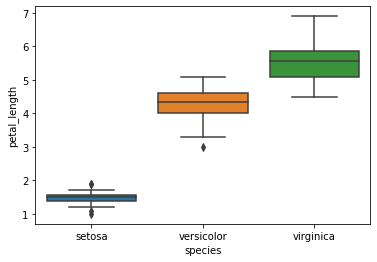

In [22]:
sns.boxplot(x='species',y='petal_length',data=df)

In [23]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

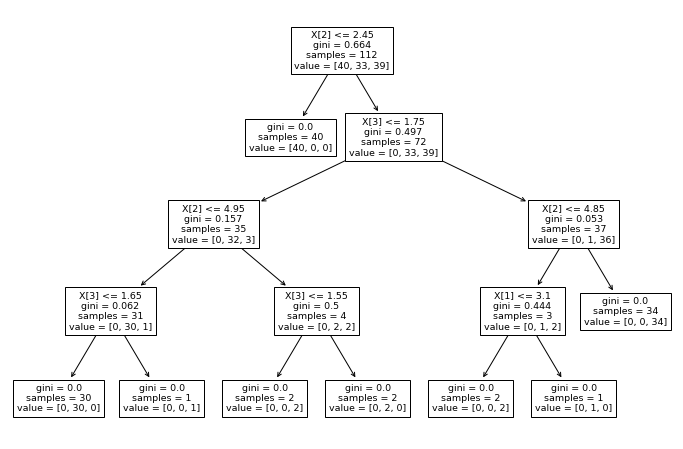

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt)
plt.show()

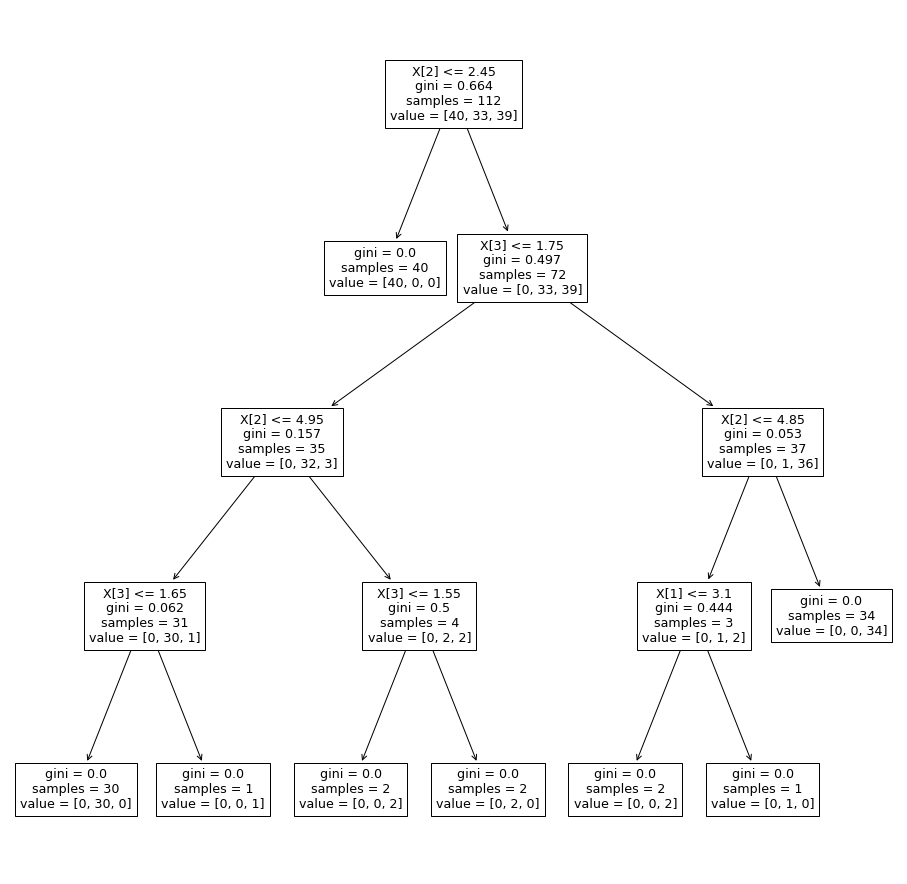

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))
plot_tree(dt)
plt.show()

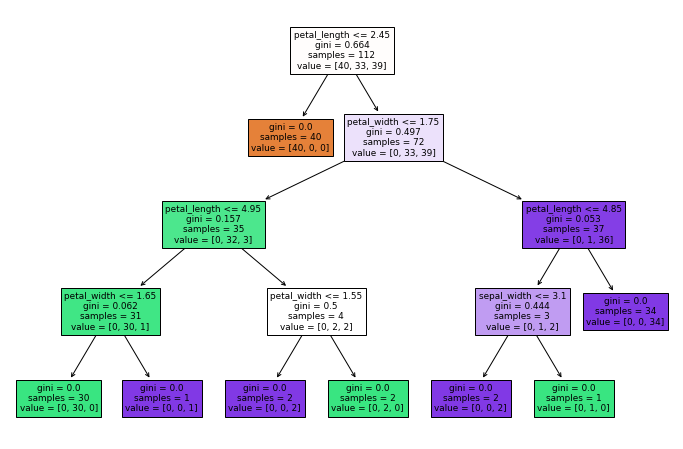

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt, filled=True, feature_names = x.columns)
plt.show()

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

In [29]:
print(accuracy_score(y_train, y_pred_rf_train))
print("\n")
print(accuracy_score(y_test, y_pred_rf_test))

1.0


0.9736842105263158


# Make text to Audio

In [30]:
pip install gTTS

Note: you may need to restart the kernel to use updated packages.


In [31]:
from gtts import gTTS

In [32]:
mysentence = input("Enter your sentence here for audio : \n >")

Enter your sentence here for audio : 
 >English, the language of England, widely used in many varieties throughout the world.


In [35]:
audio = gTTS(text=mysentence, lang='en', slow=False)

In [36]:
audio.save('English.mp3')

In [40]:
mysentence = input("Enter your sentence here for audio : \n >")

Enter your sentence here for audio : 
 >English, the language of England, widely used in many varieties throughout the world.


In [41]:
audio = gTTS(text=mysentence, lang='hi', slow=False)

In [42]:
audio.save('English_2.mp3')